In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks

def y(t):
  return np.sin(t)

def Fou(x, y, f):
  retorno = 0
  for k in range(len(y)):
    retorno += (y[k] * np.exp(-2 * np.pi * complex(0, 1) * x[k] * f))

  return retorno

t = np.linspace(0, 20, 200)
y = y(t)
f = np.linspace(0, 0.1, 256)

print(Fou(t, y, f))

[ 6.34109784+0.00000000e+00j  6.3444012 +1.54988657e-01j
  6.35430631+3.09716181e-01j  6.37079825+4.63921787e-01j
  6.39385218+6.17345383e-01j  6.42343337+7.69727922e-01j
  6.4594972 +9.20811740e-01j  6.50198925+1.07034091e+00j
  6.55084534+1.21806158e+00j  6.60599158+1.36372233e+00j
  6.66734447+1.50707449e+00j  6.73481098+1.64787250e+00j
  6.80828863+1.78587425e+00j  6.88766565+1.92084140e+00j
  6.97282103+2.05253975e+00j  7.06362469+2.18073952e+00j
  7.15993762+2.30521574e+00j  7.26161202+2.42574852e+00j
  7.36849148+2.54212343e+00j  7.48041112+2.65413175e+00j
  7.5971978 +2.76157089e+00j  7.71867029+2.86424459e+00j
  7.84463954+2.96196330e+00j  7.97490879+3.05454447e+00j
  8.10927389+3.14181285e+00j  8.24752351+3.22360075e+00j
  8.38943936+3.29974838e+00j  8.53479651+3.37010410e+00j
  8.68336359+3.43452470e+00j  8.83490314+3.49287566e+00j
  8.98917186+3.54503143e+00j  9.14592095+3.59087567e+00j
  9.30489639+3.63030148e+00j  9.46583929+3.66321167e+00j
  9.62848622+3.68951895e+00j  9

Text(0, 0.5, 'y')

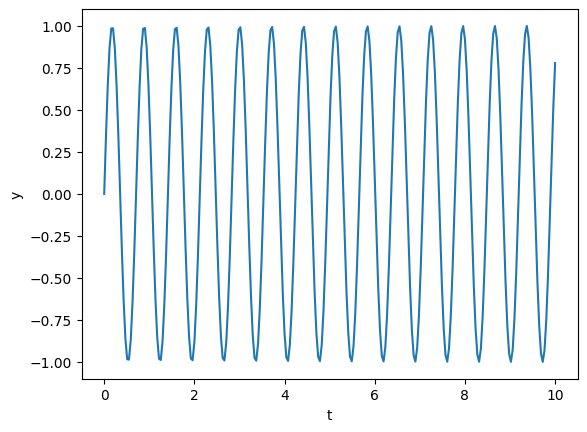

In [47]:
t_max = 10
N = 256
t = np.linspace(0, t_max, N)
y = np.sin(2 * np.pi * np.sqrt(2) * t)


Y = np.fft.fft(y)

plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("y")



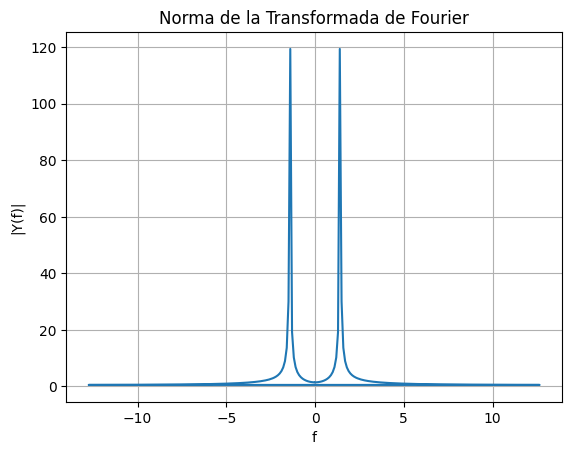

In [48]:
frecuencias = np.fft.fftfreq(N, d=t[1] - t[0])
plt.plot(frecuencias, np.abs(Y))
plt.title("Norma de la Transformada de Fourier")
plt.xlabel("f")
plt.ylabel("|Y(f)|")
plt.grid(True)
plt.show()

Text(0, 0.5, 'y')

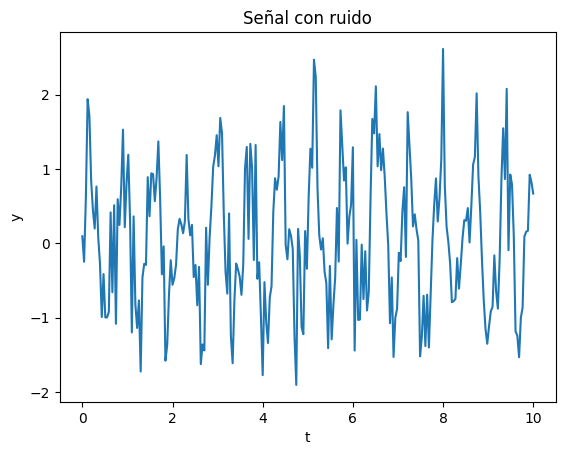

In [49]:
ruido = np.random.normal(0, 0.5, N)
y_ruido = y + ruido

Y_ruido = np.fft.fft(y_ruido)

plt.plot(t, y_ruido)
plt.title("Señal con ruido")
plt.xlabel("t")
plt.ylabel("y")




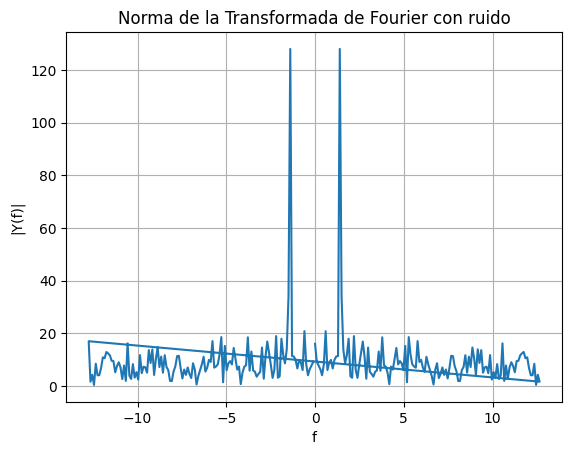

In [50]:
plt.plot(frecuencias, np.abs(Y_ruido))
plt.title("Norma de la Transformada de Fourier con ruido")
plt.xlabel("f")
plt.ylabel("|Y(f)|")
plt.grid(True)
plt.show()

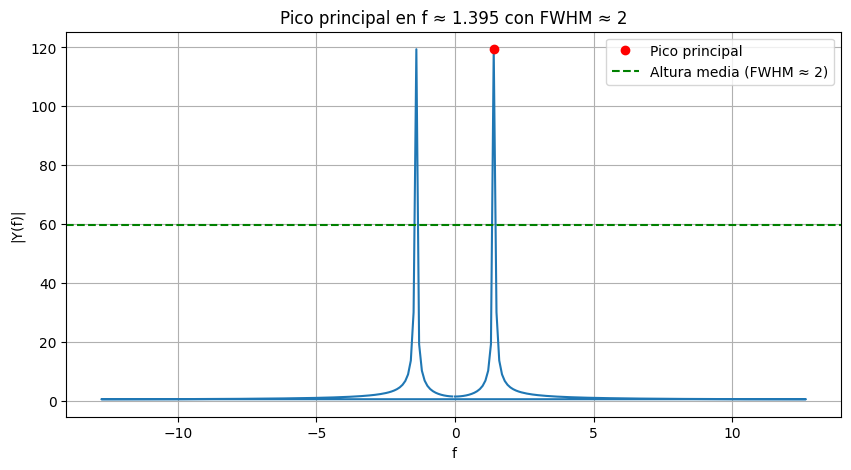

In [58]:
picos, _ = find_peaks(np.abs(Y), height=0.1)

pico_principal = picos[np.argmax(np.abs(Y[picos]))]

altura_media = np.abs(Y[pico_principal]) / 2.0
ancho_a_media_altura = np.sum(np.abs(np.abs(Y) > altura_media))

posicion_pico = frecuencias[pico_principal]


plt.figure(figsize=(10, 5))
plt.plot(frecuencias, np.abs(Y))
plt.plot(frecuencias[pico_principal], np.abs(Y[pico_principal]), "ro", label="Pico principal")
plt.axhline(altura_media, color='green', linestyle='--', label=f"Altura media (FWHM ≈ {ancho_a_media_altura})")
plt.title(f"Pico principal en f ≈ {posicion_pico:.3f} con FWHM ≈ {ancho_a_media_altura}")
plt.xlabel("f")
plt.ylabel("|Y(f)|")
plt.legend()
plt.grid(True)
plt.show()




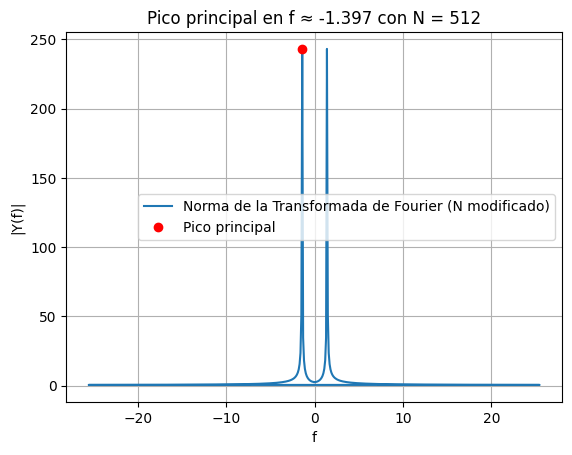

In [57]:
# Cambios al modificar N
N_new = 512
t_new = np.linspace(0, t_max, N_new)
y_new = np.sin(2 * np.pi * np.sqrt(2) * t_new)
Y_new = np.fft.fft(y_new)
frecuencias_new = np.fft.fftfreq(N_new, d=t_new[1] - t_new[0])

picos_new, _ = find_peaks(np.abs(Y_new), height=0.1)
pico_principal_new = picos_new[np.argmax(np.abs(Y_new[picos_new]))]
posicion_pico_new = frecuencias_new[pico_principal_new]

plt.plot(frecuencias_new, np.abs(Y_new), label="Norma de la Transformada de Fourier (N modificado)")
plt.plot(frecuencias_new[pico_principal_new], np.abs(Y_new[pico_principal_new]), "ro", label="Pico principal")
plt.title(f"Pico principal en f ≈ {posicion_pico_new:.3f} con N = {N_new}")
plt.xlabel("f")
plt.ylabel("|Y(f)|")
plt.legend()
plt.grid(True)
plt.show()

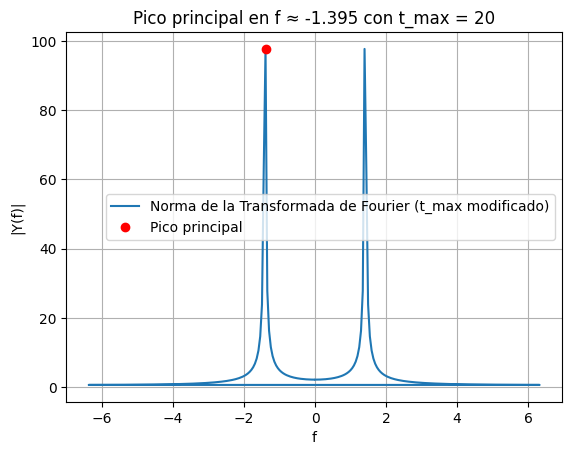

In [53]:
#modificar t_max
t_max_new = 20
t_new_range = np.linspace(0, t_max_new, N)
y_new_range = np.sin(2 * np.pi * np.sqrt(2) * t_new_range)
Y_new_range = DFT(y_new_range)
frecuencias_new_range = np.fft.fftfreq(N, d=t_new_range[1] - t_new_range[0])


picos_new_range, _ = find_peaks(np.abs(Y_new_range), height=0.1)
pico_principal_new_range = picos_new_range[np.argmax(np.abs(Y_new_range[picos_new_range]))]
posicion_pico_new_range = frecuencias_new_range[pico_principal_new_range]



plt.plot(frecuencias_new_range, np.abs(Y_new_range), label="Norma de la Transformada de Fourier (t_max modificado)")
plt.plot(frecuencias_new_range[pico_principal_new_range], np.abs(Y_new_range[pico_principal_new_range]), "ro", label="Pico principal")
plt.title(f"Pico principal en f ≈ {posicion_pico_new_range:.3f} con t_max = {t_max_new}")
plt.xlabel("f")
plt.ylabel("|Y(f)|")
plt.legend()
plt.grid(True)
plt.show()


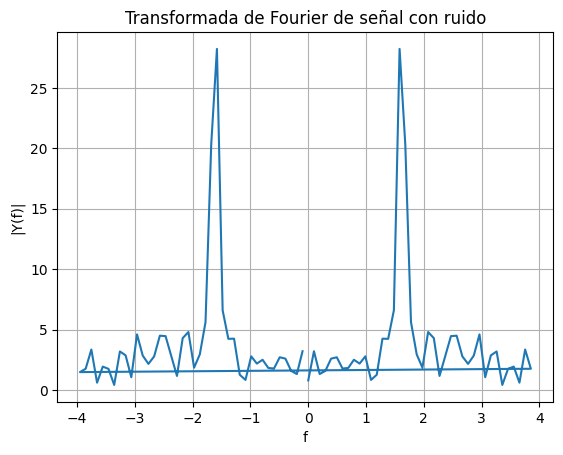

In [54]:
# Transformada de la variable con ruido
N = 80
ts_0 = np.linspace(0, 10, N)
ts = ts_0 + np.random.normal(0., 0.01, N)
f = 2 * np.pi
ys = np.sin(2 * np.pi * ts * f)


Y_distorted = np.fft.fft(ys)
frecuencias_distorted = np.fft.fftfreq(N, d=ts_0[1] - ts_0[0])

plt.plot(frecuencias_distorted, np.abs(Y_distorted))
plt.title("Transformada de Fourier de señal con ruido")
plt.xlabel("f")
plt.ylabel("|Y(f)|")
plt.grid(True)
plt.show()


-0.08576963085163482


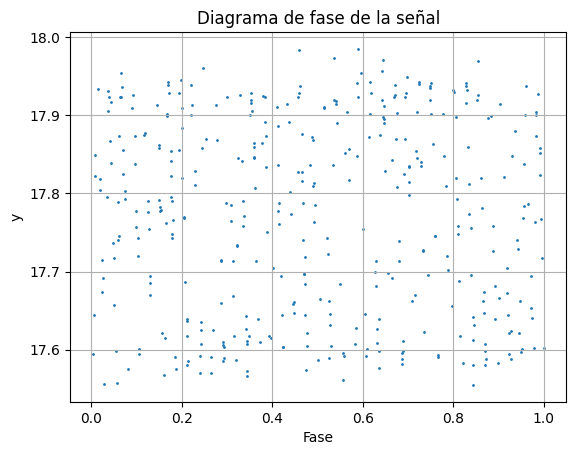

In [59]:
url = "https://www.astrouw.edu.pl/ogle/ogle4/OCVS/lmc/cep/phot/I/OGLE-LMC-CEP-0001.dat"
datos = pd.read_csv(url, delim_whitespace=True, header=None, names=['t', 'y', 'sigma_y'])

Y_datos = np.fft.fft(datos['y'].values)
frecuencias_datos = np.fft.fftfreq(len(datos['y']), d=np.mean(np.diff(datos['t'])))


picos_datos, _ = find_peaks(np.abs(Y_datos), height=0.1)
pico_principal_datos = picos_datos[np.argmax(np.abs(Y_datos[picos_datos]))]
frecuencia_principal = frecuencias_datos[pico_principal_datos]
print(frecuencia_principal)


phi = np.mod(datos['t'] * frecuencia_principal, 1)


plt.scatter(phi, datos['y'], s=1)
plt.title("Diagrama de fase de la señal")
plt.xlabel("Fase")
plt.ylabel("y")
plt.grid(True)
plt.show()

#No se muy bien como pasar de estos datos a la construccion de una onda o imagen
#a la cual poder aplicarle la transformada de fourier

#Este codigo fue hecho con ligero apoyo de chatgpt para poder aplicar funciones desconocidas u olvidadas como:
#find_peaks, np.fft.fft, np.fft.fftfreq, read_csv.
